In [243]:
import fastf1
import fastf1.plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl.styles import PatternFill
from openpyxl import Workbook
from openpyxl import load_workbook
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [226]:
ses = 2


In [17]:
session = fastf1.get_session(2023,10,sessions[str(ses)])
session.load()


core           INFO 	Loading data for British Grand Prix - Practice 2 [v2.3.1]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, o

### Pre defined

In [18]:
compound_color = {'HARD': 'F0F0EC', 
                  'INTERMEDIATE': '43B02A', 
                  'MEDIUM': 'FFD12E', 
                  'SOFT': 'DA291C', 
                  'TEST-UNKNOWN': '434649', 
                  'UNKNOWN': '00FFFF', 
                  'WET': '0067AD'}
compound = ['All Compounds','SOFT','MEDIUM','HARD']

In [235]:
sessions = {
    '1':'FP1',
    '2':'FP2',
    '3':'FP3'
}

### Code Start

In [19]:
def max_lap(laps):
    grouped = laps.groupby("Driver")
    count_values = grouped['LapNumber'].count()
    return count_values.max()

laps = session.laps.pick_quicklaps()
max_lap = int(max_lap(laps)+1)
max_lap_time = int(session.laps["LapTime"].dt.total_seconds().max())
drivers = session.drivers
comp = 0

In [20]:
laps['LapTimeMinute'] = pd.to_timedelta(laps['LapTime'])
laps['LapTimeMinute'] = laps['LapTimeMinute'].apply(lambda x: f"{x.seconds//60:02d}:{x.seconds%60:02d}.{x.microseconds//1000:03d}")


C:\Users\GTR\AppData\Local\Temp\ipykernel_19408\607930657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeMinute'] = pd.to_timedelta(laps['LapTime'])
C:\Users\GTR\AppData\Local\Temp\ipykernel_19408\607930657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeMinute'] = laps['LapTimeMinute'].apply(lambda x: f"{x.seconds//60:02d}:{x.seconds%60:02d}.{x.microseconds//1000:03d}")


In [21]:
if(comp == 0):
    laps_session = laps[["DriverNumber","Driver","LapNumber","LapStartDate","Compound","LapTime"]]
    laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
    laps_session["LapStartDate"] = pd.to_datetime(laps_session["LapStartDate"])
    laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.strftime('%H:%M')

else:
    laps_session = laps.loc[(laps["Compound"] == compound[comp]),["DriverNumber","Driver","LapNumber","LapStartDate","Compound","LapTime"]]
    laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
    laps_session["LapStartDate"] = pd.to_datetime(laps_session["LapStartDate"])
    laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.strftime('%H:%M')

C:\Users\GTR\AppData\Local\Temp\ipykernel_19408\2774223378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
C:\Users\GTR\AppData\Local\Temp\ipykernel_19408\2774223378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_session["LapStartDate"] = pd.to_datetime(laps_session["LapStartDate"])
C:\Users\GTR\AppData\Local\Temp\ipykernel_19408\2774223378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [22]:
max_lap_time = int(laps_session["LapTimeS"].max()+3)
min_lap_time = int(laps_session["LapTimeS"].min()-1)

### Graph Pace Practice

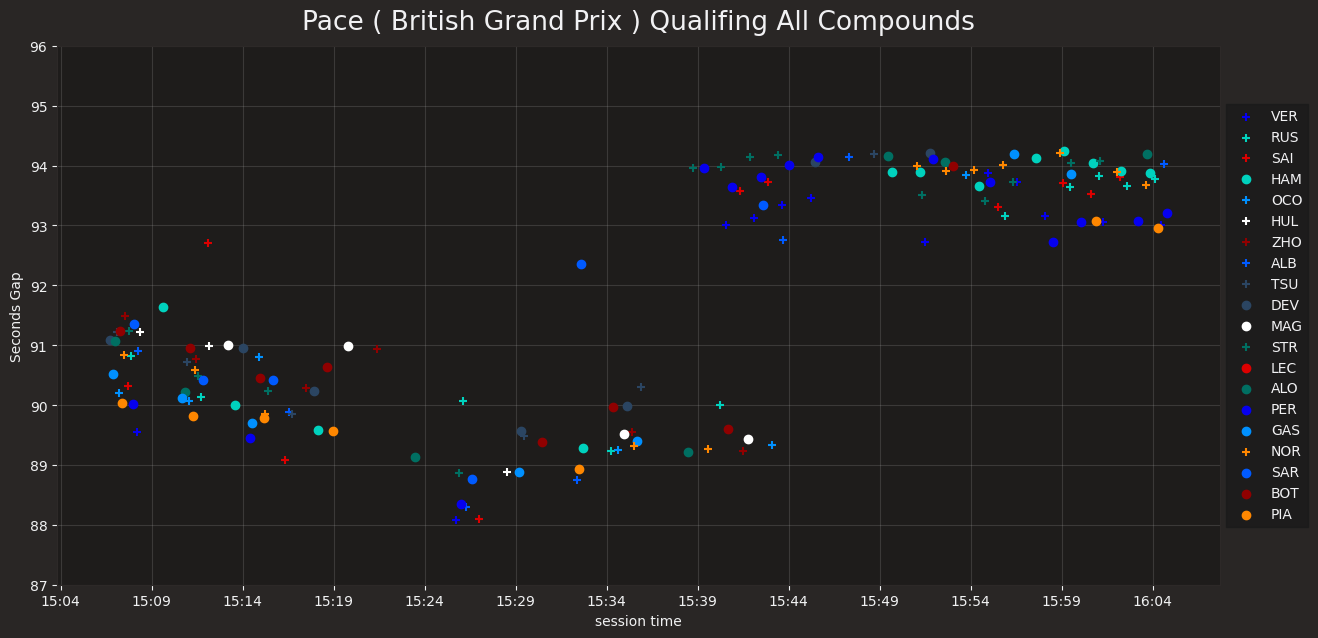

In [23]:
plt.figure(figsize=(15, 7))
color_picked = []
# for i in drivers[:10]:
for i in drivers:
    lap_ordred = laps_session.loc[laps_session["DriverNumber"] == i].sort_values(by='LapStartDateM', ascending=True)
    x = lap_ordred["LapStartDate"]
    y = lap_ordred["LapTimeS"]

    driver_name = session.get_driver(i)["Abbreviation"]
    team_color =  fastf1.plotting.team_color(session.get_driver(i)["TeamName"])
    
    if team_color in color_picked:
        plt.scatter(x, y, color=team_color, marker='o', label=driver_name)
    else:    
        plt.scatter(x, y, color=team_color, marker='+', label=driver_name)
        color_picked.append(team_color)
# Set the x-axis formatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Set the x-axis locator
locator = mdates.MinuteLocator(interval=5)
plt.gca().xaxis.set_major_locator(locator)

# Customize the plot
plt.title('Pace ( '+session.event["EventName"]+' ) Qualifing' +" "+compound[comp])
plt.xlabel('session time')
plt.ylabel('Seconds Gap')

plt.yticks(range(min_lap_time, max_lap_time, 1))

plt.grid(True, alpha=0.2)

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


### Table pace 

In [32]:
data_time = pd.DataFrame()
data_time ["lapNumber"] = [i for i in range(1, max_lap+1)]
data_comp = pd.DataFrame()
data_comp ["lapNumber"] = [i for i in range(1, max_lap+1)]

In [33]:
for i in drivers:
    data_time [session.get_driver(i)['Abbreviation']] = laps.loc[laps["DriverNumber"]==i,["LapTimeMinute"]].reset_index(drop=True)
    data_comp [session.get_driver(i)['Abbreviation']] = laps.loc[laps["DriverNumber"]==i,["Compound"]].reset_index(drop=True)

In [34]:
df = pd.DataFrame(data_time)

df.to_excel('Session_lap_time.xlsx', index=False)
# Charger le fichier Excel existant
fichier_excel = 'Session_lap_time.xlsx'
classeur = load_workbook(fichier_excel)

# Sélectionner la feuille active
feuille = classeur.active

for j in range(1,data_time.shape[1]):
    for i in range(0,data_time.shape[0]):
        compound = data_comp.iloc[i,j]
        if(compound == "HARD"):
            couleur = compound_color["HARD"]
        elif(compound == "MEDIUM"):
            couleur = compound_color["MEDIUM"]
        elif(compound == "SOFT"):
            couleur = compound_color["SOFT"]
        else:
            couleur = 'FFFFFF'
        cellule = feuille.cell(row=i+2, column=j+1)
        cellule.fill = PatternFill(start_color=couleur, end_color=couleur, fill_type='solid')

# Enregistrer les modifications dans le fichier Excel
classeur.save(fichier_excel)

### Top Speed in session

In [71]:
driver_list = []
DriverAB_list = []
top_speed_list = []
color_list = []
df_top_speed = pd.DataFrame()
for i in drivers:
    if laps.pick_driver(i).empty:
        print("The DataFrame is empty")
    else:
        max_speed = laps.pick_driver(i).pick_fastest().get_car_data()
        Top_Speed = max_speed.loc[max_speed['Speed'].idxmax(),"Speed"]
        Driver = session.get_driver(i)[["DriverNumber"]].values[0]
        DriverAB = session.get_driver(i)[["Abbreviation"]].values[0]
        TeamColor = fastf1.plotting.team_color(session.get_driver(i)["TeamName"])
        driver_list.append(Driver)
        DriverAB_list.append(DriverAB)
        top_speed_list.append(Top_Speed)
        color_list.append(TeamColor)
df_top_speed["DriverNumber"] = driver_list
df_top_speed["Driver"] = DriverAB_list
df_top_speed["TopSpeed"] = top_speed_list
df_top_speed["Color"] = color_list
df_top_speed = df_top_speed.sort_values(by='TopSpeed', ascending=False)


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

The DataFrame is empty


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

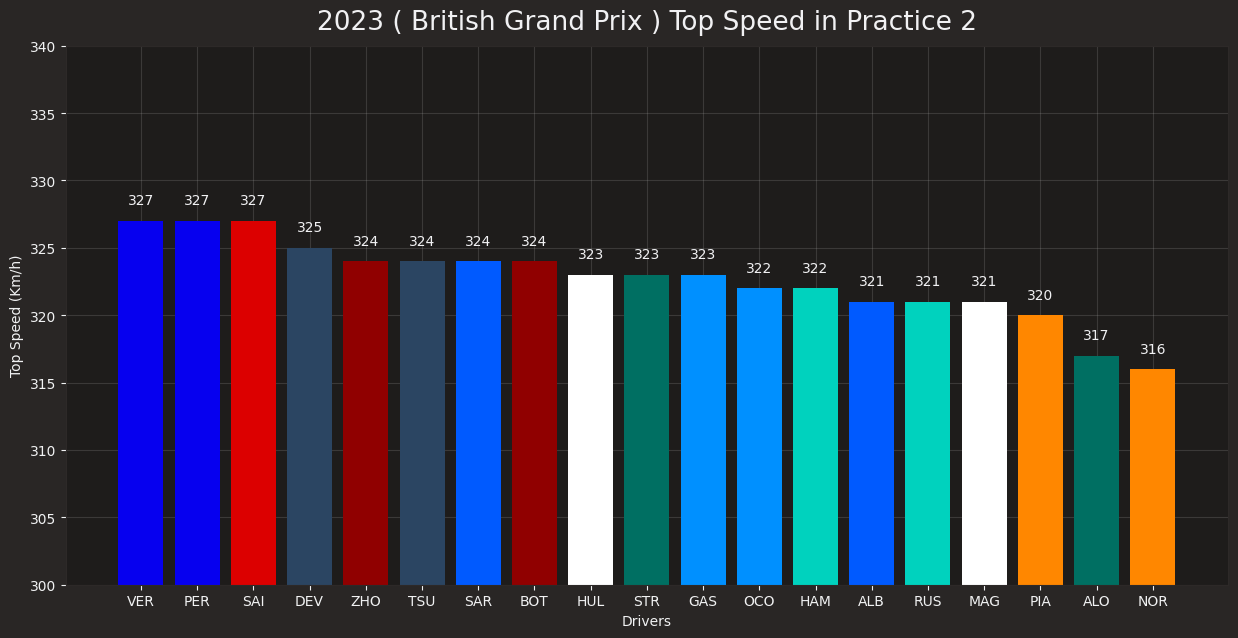

In [72]:
plt.figure(figsize=(15, 7))
x = df_top_speed["Driver"].reset_index(drop=True)
y = df_top_speed["TopSpeed"].reset_index(drop=True)

# Create the bar plot
plt.bar(x, y,color = df_top_speed["Color"])

# Add labels and title
plt.xlabel('Drivers')
plt.ylabel('Top Speed (Km/h)')
plt.title('2023 ( '+session.event["EventName"]+' ) Top Speed in '+session.event["Session2"])
plt.yticks(range(300, 400, 5))
plt.ylim(300, 340)
# Add text annotations on top of bars
for i in range(len(x)):
    plt.text(i, y.loc[i]+1, str(y.loc[i]), ha='center', va='bottom')
    
plt.grid(True, alpha=0.2)
# Display the plot
plt.show()

### averege Speed in fastest lap

In [73]:
driver_list = []
DriverAB_list = []
avg_speed_list = []
color_list = []
df_avg_speed = pd.DataFrame()
for i in drivers:
    if laps.pick_driver(i).empty:
        print("The DataFrame is empty")
    else:
        max_speed = laps.pick_driver(i).pick_fastest().get_car_data()
        avg_Speed = round(max_speed["Speed"].mean())
        Driver = session.get_driver(i)[["DriverNumber"]].values[0]
        DriverAB = session.get_driver(i)[["Abbreviation"]].values[0]
        TeamColor = fastf1.plotting.team_color(session.get_driver(i)["TeamName"])
        driver_list.append(Driver)
        DriverAB_list.append(DriverAB)
        avg_speed_list.append(avg_Speed)
        color_list.append(TeamColor)
df_avg_speed["DriverNumber"] = driver_list
df_avg_speed["Driver"] = DriverAB_list
df_avg_speed["AvgSpeed"] = avg_speed_list
df_avg_speed["Color"] = color_list
df_avg_speed = df_avg_speed.sort_values(by='AvgSpeed', ascending=False)


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

The DataFrame is empty


c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` or `Driver.FirstName` instead.
  warnings.warn(
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2659: FutureWarning: The `Driver.name` property is deprecated and will beremoved in a future version.
Use `Driver['FirstName']` 

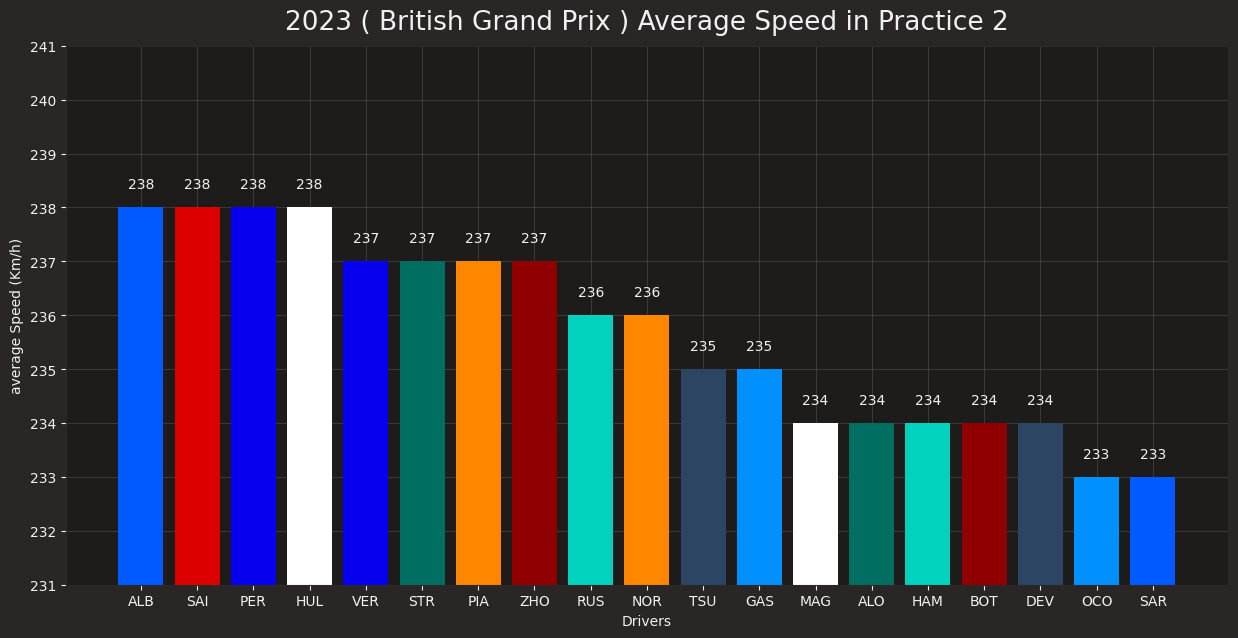

In [74]:
plt.figure(figsize=(15, 7))
x = df_avg_speed["Driver"].reset_index(drop=True)
y = df_avg_speed["AvgSpeed"].reset_index(drop=True)

# Create the bar plot
plt.bar(x, y,color = df_avg_speed["Color"])

# Add labels and title
plt.xlabel('Drivers')
plt.ylabel('average Speed (Km/h)')
plt.title('2023 ( '+session.event["EventName"]+' ) Average Speed in '+session.event["Session2"])
plt.yticks(range(0, 250, 1))
plt.ylim(y.min()-2, y.max()+3)
# Add text annotations on top of bars
for i in range(len(x)):
    plt.text(i, y.loc[i]+0.3, str(y.loc[i]), ha='center', va='bottom')

plt.grid(True, alpha=0.2)

# Display the plot
plt.show()

### gap fastest lap 

In [83]:
laps["LapTimeS"] = laps["LapTime"].dt.total_seconds()

C:\Users\GTR\AppData\Local\Temp\ipykernel_19408\3128682134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps["LapTimeS"] = laps["LapTime"].dt.total_seconds()


In [117]:
pd.DataFrame(laps.pick_driver(1).pick_fastest()).T.reset_index(drop=True)

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeMinute,LapTimeS
0,0 days 00:34:36.156000,1,0 days 00:01:28.078000,7.0,NaT,NaT,0 days 00:00:27.838000,0 days 00:00:35.716000,0 days 00:00:24.524000,0 days 00:33:35.916000,...,True,2,0 days 00:33:08.078000,Red Bull Racing,VER,1,True,2023-07-07 15:25:42.979,01:28.078,88.078


In [175]:
team_color = []
fastest_lap = pd.DataFrame(laps.pick_driver(1).pick_fastest()).T.reset_index(drop=True)
fastest_lap = fastest_lap.drop(0)
for i in drivers:
    fastlap = pd.DataFrame(laps.pick_driver(i).pick_fastest()).T.reset_index(drop=True)
    if (fastlap.isnull().all(axis=1).all()== False):
        fastest_lap = pd.concat([fastest_lap,fastlap ], ignore_index=True)
        team_color.append(fastf1.plotting.team_color(session.get_driver(i)["TeamName"]))
fastest_lap["LapTimeS"].fillna(0, inplace=True)
fastest_lap["TeamColor"] = team_color

c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:2328: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [214]:
fastest_lap = fastest_lap.sort_values(by='LapTimeS').reset_index(drop=True)

In [215]:
# fastest_lap[["DriverNumber","Driver","LapTimeMinute","LapTimeS","TeamColor"]]
fastest_lap["Gap"] = fastest_lap["LapTimeS"]-fastest_lap["LapTimeS"].min()
fastest_lap

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeMinute,LapTimeS,TeamColor,Gap
0,0 days 00:34:36.156000,1,0 days 00:01:28.078000,7.0,NaT,NaT,0 days 00:00:27.838000,0 days 00:00:35.716000,0 days 00:00:24.524000,0 days 00:33:35.916000,...,0 days 00:33:08.078000,Red Bull Racing,VER,1,True,2023-07-07 15:25:42.979,01:28.078,88.078,#0600ef,0.0
1,0 days 00:35:52.530000,55,0 days 00:01:28.100000,9.0,NaT,NaT,0 days 00:00:27.922000,0 days 00:00:35.721000,0 days 00:00:24.457000,0 days 00:34:52.352000,...,0 days 00:34:24.430000,Ferrari,SAI,1,True,2023-07-07 15:26:59.331,01:28.100,88.1,#dc0000,0.022
2,0 days 00:35:10.468000,23,0 days 00:01:28.296000,9.0,NaT,NaT,0 days 00:00:27.920000,0 days 00:00:35.803000,0 days 00:00:24.573000,0 days 00:34:10.092000,...,0 days 00:33:42.172000,Williams,ALB,1,True,2023-07-07 15:26:17.073,01:28.296,88.296,#005aff,0.218
3,0 days 00:34:53.249000,11,0 days 00:01:28.342000,8.0,NaT,NaT,0 days 00:00:27.971000,0 days 00:00:35.897000,0 days 00:00:24.474000,0 days 00:33:52.878000,...,0 days 00:33:24.907000,Red Bull Racing,PER,1,True,2023-07-07 15:25:59.808,01:28.342,88.342,#0600ef,0.264
4,0 days 00:35:29.936000,2,0 days 00:01:28.766000,9.0,NaT,NaT,0 days 00:00:28.167000,0 days 00:00:35.958000,0 days 00:00:24.641000,0 days 00:34:29.337000,...,0 days 00:34:01.170000,Williams,SAR,1,True,2023-07-07 15:26:36.071,01:28.766,88.766,#005aff,0.688
5,0 days 00:34:45.734000,18,0 days 00:01:28.866000,9.0,NaT,NaT,0 days 00:00:27.971000,0 days 00:00:36.027000,0 days 00:00:24.868000,0 days 00:33:44.839000,...,0 days 00:33:16.868000,Aston Martin,STR,1,True,2023-07-07 15:25:51.769,01:28.866,88.866,#006f62,0.788
6,0 days 00:37:25.102000,27,0 days 00:01:28.880000,7.0,NaT,NaT,0 days 00:00:27.937000,0 days 00:00:36.307000,0 days 00:00:24.636000,0 days 00:36:24.159000,...,0 days 00:35:56.222000,Haas F1 Team,HUL,1,True,2023-07-07 15:28:31.123,01:28.880,88.88,#ffffff,0.802
7,0 days 00:38:03.981000,10,0 days 00:01:28.889000,9.0,NaT,NaT,0 days 00:00:27.998000,0 days 00:00:36.245000,0 days 00:00:24.646000,0 days 00:37:03.090000,...,0 days 00:36:35.092000,Alpine,GAS,1,True,2023-07-07 15:29:09.993,01:28.889,88.889,#0090ff,0.811
8,0 days 00:41:22.260000,81,0 days 00:01:28.926000,11.0,NaT,NaT,0 days 00:00:28.140000,0 days 00:00:36.014000,0 days 00:00:24.772000,0 days 00:40:21.474000,...,0 days 00:39:53.334000,McLaren,PIA,1,True,2023-07-07 15:32:28.235,01:28.926,88.926,#ff8700,0.848
9,0 days 00:32:24.011000,14,0 days 00:01:29.134000,7.0,NaT,NaT,0 days 00:00:28.268000,0 days 00:00:36.034000,0 days 00:00:24.832000,0 days 00:31:23.145000,...,0 days 00:30:54.877000,Aston Martin,ALO,1,True,2023-07-07 15:23:29.778,01:29.134,89.134,#006f62,1.056


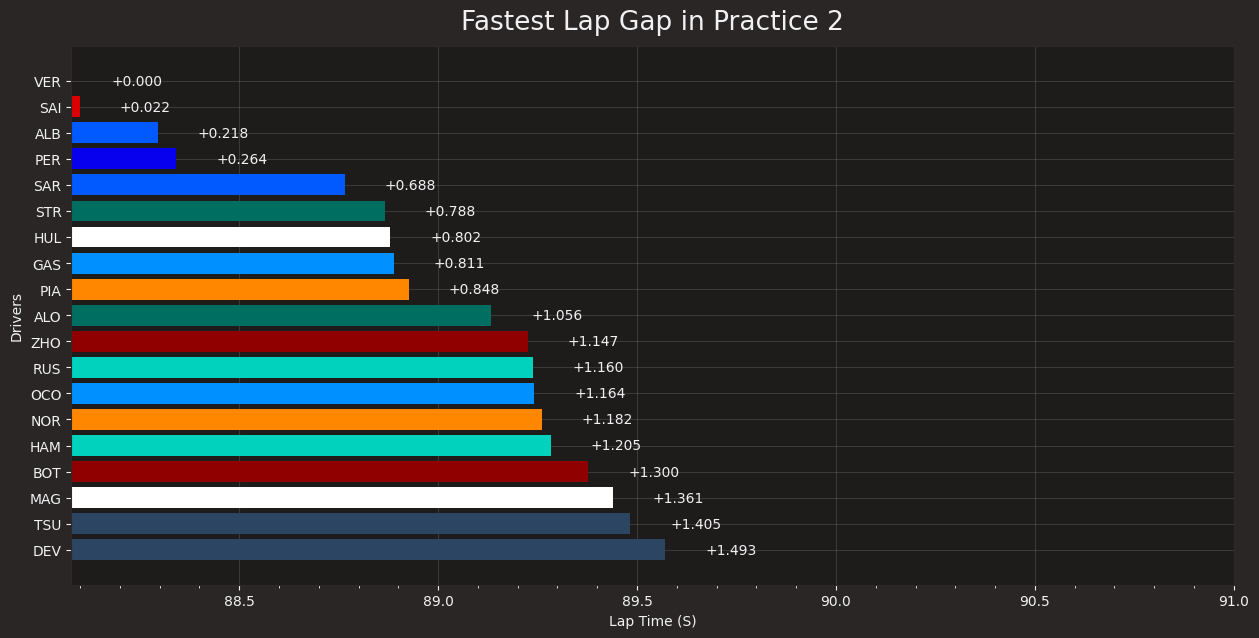

In [247]:
plt.figure(figsize=(15, 7))

y = fastest_lap["Driver"]
x = fastest_lap["LapTimeS"]
minx = fastest_lap["LapTimeS"].min()
# Create the horizontal bar plot
plt.barh(y,x , color = fastest_lap["TeamColor"])

# Set labels and title
plt.xlabel('Lap Time (S)')
plt.ylabel('Drivers')
plt.title('Fastest Lap Gap in Practice '+str(ses))
plt.xticks(range(80, 95, 1))
plt.xlim(minx, 91)
plt.gca().invert_yaxis()
# Set the y-axis ticker to display integer values with increments of 0.1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.1))

plt.grid(True,alpha = 0.2)


# Add text annotations near each bar
for i in range(0,len(y)):
    plt.text(fastest_lap["LapTimeS"][i] + 0.1, i, "+"+"{:.3f}".format(fastest_lap["Gap"][i]), va='center')

# Display the plot
plt.show()